In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
df = pd.read_csv('data/trainset.csv')
df

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
...,...,...
4377,Investments in product development stood at 6....,neutral
4378,HSBC Says Unit to Book $585 Million Charge on ...,negative
4379,RISING costs have forced packaging producer Hu...,negative
4380,"In the building and home improvement trade , s...",neutral


In [16]:
proportion_neg = df.loc[df['Sentiment'] == 'negative'].shape[0] / df.shape[0]
proportion_neutral = df.loc[df['Sentiment'] == 'neutral'].shape[0] / df.shape[0]
proportion_positive = df.loc[df['Sentiment'] == 'positive'].shape[0] / df.shape[0]
props = [proportion_neg, proportion_neutral, proportion_positive]
props

[0.14513920584208123, 0.5392514833409402, 0.31560931081697857]

Text(0.5, 1.0, 'Proportion for each Sentiment')

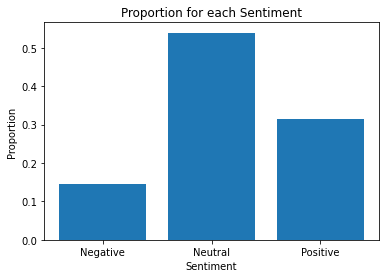

In [17]:
plt.bar(['Negative', 'Neutral', 'Positive'], props)
plt.xlabel('Sentiment')
plt.ylabel('Proportion')
plt.title('Proportion for each Sentiment') 


In [18]:
df.head()

,Sentence,Sentiment
0,According to the Finnish-Russian Chamber of Co...,neutral
1,The Swedish buyout firm has sold its remaining...,neutral
2,$SPY wouldn't be surprised to see a green close,positive
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative


In [19]:
a = pd.DataFrame(df['Sentence'].str.replace(',', ''))
b = pd.DataFrame(a['Sentence'].str.replace('.', ''))
c = pd.DataFrame(b['Sentence'].str.replace(' ', ''))
d = pd.DataFrame(c['Sentence'].str.replace('-', ''))
df['sentence_is_alpha_or_numeric'] = list(map(lambda x: x.isalpha() or x.isnumeric() or x.isalnum(), d['Sentence']))
# d.loc[0]['Sentence']
df
# df

<ipython-input-19-b09258b6ea65>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  b = pd.DataFrame(a['Sentence'].str.replace('.', ''))


,Sentence,Sentiment,sentence_is_alpha_or_numeric
0,According to the Finnish-Russian Chamber of Co...,neutral,True
1,The Swedish buyout firm has sold its remaining...,neutral,True
2,$SPY wouldn't be surprised to see a green close,positive,False
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,False
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,False
...,...,...,...
4377,Investments in product development stood at 6....,neutral,False
4378,HSBC Says Unit to Book $585 Million Charge on ...,negative,False
4379,RISING costs have forced packaging producer Hu...,negative,True
4380,"In the building and home improvement trade , s...",neutral,False


In [20]:
df[df['sentence_is_alpha_or_numeric']==True]

,Sentence,Sentiment,sentence_is_alpha_or_numeric
0,According to the Finnish-Russian Chamber of Co...,neutral,True
1,The Swedish buyout firm has sold its remaining...,neutral,True
8,The subdivision made sales revenues last year ...,positive,True
9,Viking Line has canceled some services .,neutral,True
14,Elcoteq SE is listed on the Nasdaq OMX Helsink...,neutral,True
...,...,...,...
4369,Finnish electronics contract manufacturer Scan...,negative,True
4374,"Swedish , Finnish and Danish listed companies ...",neutral,True
4376,"In 2008 , Kemira recorded revenue of approxima...",neutral,True
4379,RISING costs have forced packaging producer Hu...,negative,True


In [21]:
df[df['sentence_is_alpha_or_numeric']==False]

,Sentence,Sentiment,sentence_is_alpha_or_numeric
2,$SPY wouldn't be surprised to see a green close,positive,False
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,False
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,False
5,The Stockmann department store will have a tot...,neutral,False
6,Circulation revenue has increased by 5 % in Fi...,positive,False
...,...,...,...
4373,"$SBUX down PM, from $DB downgrade.. PT cut fro...",negative,False
4375,Finnish developer and manufacturer of mobile p...,negative,False
4377,Investments in product development stood at 6....,neutral,False
4378,HSBC Says Unit to Book $585 Million Charge on ...,negative,False


In [22]:
def sentence_len(col):
    return len(col)

In [23]:
df['len_of_sentence'] = df['Sentence'].apply(sentence_len)
df

,Sentence,Sentiment,sentence_is_alpha_or_numeric,len_of_sentence
0,According to the Finnish-Russian Chamber of Co...,neutral,True,128
1,The Swedish buyout firm has sold its remaining...,neutral,True,135
2,$SPY wouldn't be surprised to see a green close,positive,False,47
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,False,56
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,False,190
...,...,...,...,...
4377,Investments in product development stood at 6....,neutral,False,72
4378,HSBC Says Unit to Book $585 Million Charge on ...,negative,False,56
4379,RISING costs have forced packaging producer Hu...,negative,True,107
4380,"In the building and home improvement trade , s...",neutral,False,88


In [31]:
df['len_of_sentence'].median()

107.0

In [38]:
bottom_50 = df[df['len_of_sentence'] <= 107]
bottom_50

,Sentence,Sentiment,sentence_is_alpha_or_numeric,len_of_sentence
2,$SPY wouldn't be surprised to see a green close,positive,False,47
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,False,56
6,Circulation revenue has increased by 5 % in Fi...,positive,False,79
9,Viking Line has canceled some services .,neutral,True,40
11,$FB gone green on day,positive,False,21
...,...,...,...,...
4376,"In 2008 , Kemira recorded revenue of approxima...",neutral,True,93
4377,Investments in product development stood at 6....,neutral,False,72
4378,HSBC Says Unit to Book $585 Million Charge on ...,negative,False,56
4379,RISING costs have forced packaging producer Hu...,negative,True,107


In [39]:
bottom_50[bottom_50['Sentiment']=='neutral']

,Sentence,Sentiment,sentence_is_alpha_or_numeric,len_of_sentence
9,Viking Line has canceled some services .,neutral,True,40
13,The company 's share is quoted on NASDAQ OMX H...,neutral,False,79
14,Elcoteq SE is listed on the Nasdaq OMX Helsink...,neutral,True,54
17,"In stead of being based on a soft drink , as i...",neutral,True,104
19,The company closed last year with a turnover o...,neutral,True,74
...,...,...,...,...
4357,Rivals say Qualcomm has fewer patents on 3G ph...,neutral,True,104
4368,$PAY 2nd time test of the 21.20-30 b/o zone. ...,neutral,False,97
4376,"In 2008 , Kemira recorded revenue of approxima...",neutral,True,93
4377,Investments in product development stood at 6....,neutral,False,72


In [40]:
bottom_50[bottom_50['Sentiment']=='positive']

,Sentence,Sentiment,sentence_is_alpha_or_numeric,len_of_sentence
2,$SPY wouldn't be surprised to see a green close,positive,False,47
6,Circulation revenue has increased by 5 % in Fi...,positive,False,79
11,$FB gone green on day,positive,False,21
16,"Aviva, Friends Life top forecasts ahead of 5.6...",positive,True,67
20,Shire CEO steps up drive to get Baxalta board ...,positive,True,53
...,...,...,...,...
4355,"The new office , located in Shenzhen , will st...",positive,False,105
4356,"However , the total orders received will still...",positive,True,76
4360,$GOOG resistance turned support? It,positive,False,36
4367,$CERN - consolidating above 50 & 200 MA - nice...,positive,False,102


In [41]:
bottom_50[bottom_50['Sentiment']=='negative']

,Sentence,Sentiment,sentence_is_alpha_or_numeric,len_of_sentence
3,Shell's $70 Billion BG Deal Meets Shareholder ...,negative,False,56
25,$AAPL afternoon selloff as usual will be bruta...,negative,False,82
28,InterContinental Hotels first-quarter global r...,negative,True,72
31,L&G still paying price for dividend cut during...,negative,False,65
44,AstraZeneca profit down as sales of stalwarts ...,negative,True,50
...,...,...,...,...
4361,$BOBE down $2.84 premarket,negative,False,27
4366,$ACAD under $2 today?,negative,False,21
4373,"$SBUX down PM, from $DB downgrade.. PT cut fro...",negative,False,57
4378,HSBC Says Unit to Book $585 Million Charge on ...,negative,False,56


In [49]:
bottom = [bottom_50[bottom_50['Sentiment']=='negative'].shape[0], bottom_50[bottom_50['Sentiment']=='neutral'].shape[0], bottom_50[bottom_50['Sentiment']=='positive'].shape[0]]
bottom

[375, 1081, 761]

In [50]:
top_50 = df[df['len_of_sentence'] > 107]
top_50

,Sentence,Sentiment,sentence_is_alpha_or_numeric,len_of_sentence
0,According to the Finnish-Russian Chamber of Co...,neutral,True,128
1,The Swedish buyout firm has sold its remaining...,neutral,True,135
4,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative,False,190
5,The Stockmann department store will have a tot...,neutral,False,179
7,$SAP Q1 disappoints as #software licenses down...,negative,False,135
...,...,...,...,...
4370,`` In the newly formed company YIT Stavo the l...,positive,False,268
4372,"( ADPnews ) - Oct 21 , 2009 - Finland-based IT...",negative,False,231
4374,"Swedish , Finnish and Danish listed companies ...",neutral,True,133
4375,Finnish developer and manufacturer of mobile p...,negative,False,160


In [51]:
top = [top_50[top_50['Sentiment']=='negative'].shape[0], top_50[top_50['Sentiment']=='neutral'].shape[0], top_50[top_50['Sentiment']=='positive'].shape[0]]
top

[261, 1282, 622]

Text(0.5, 1.0, 'Count for each Sentiment for bottom')

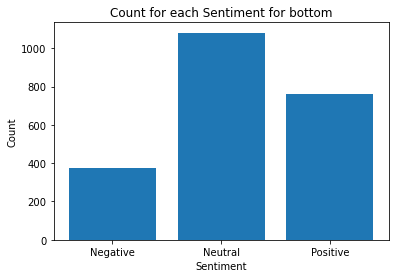

In [55]:
plt.bar(['Negative', 'Neutral', 'Positive'], bottom)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count for each Sentiment for bottom') 

Text(0.5, 1.0, 'Count for each Sentiment for top')

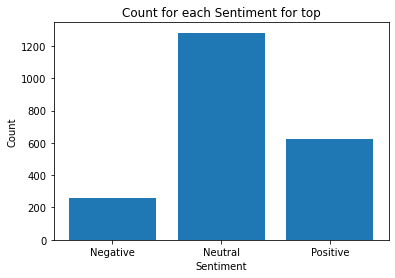

In [56]:
plt.bar(['Negative', 'Neutral', 'Positive'], top)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count for each Sentiment for top') 